# Q4 - Aritificial Neural Networks

***Train, validate, and test a neural network model using the dataset in hw3q4.zip, which contains training data (75%), validation data (12.5%), and test data (12.5%). There are two output classes in this data set. You can either choose matlab or a python neural networks package, Keras for this problem.***

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import math
import sys
import os
np.random.seed(7)
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
import tensorflow as tf
tf.set_random_seed(7)
%matplotlib inline

## (a) Please briefly describe how to construct your working environments (e.g. language, package version, backend for neural networks, installation, etc.) in your report, and write how to execute your codes on 'readme' file.

***TODO:***

## (b) Keras Model

#### Helper Functions

In [2]:
def get_data(zipname,filename):
    zf = zipfile.ZipFile(zipname)
    data = None
    with zf.open(filename, 'r') as fp:
        data = np.asarray([[float(v.strip()) for v in x.decode().strip().split(',')] for x in fp.readlines()])
    return data

In [3]:
def ANN(n_neurons, output_dims):
    input_layer = Input(batch_shape = (None, 61), name='input_layer')
    layer = Dense(n_neurons, name='hidden_layer')(input_layer)
    layer = Activation(activation='relu', name='relu')(layer)
    layer = Dense(output_dims, name='output_layer')(layer)
    output_layer = Activation(activation='sigmoid', name='sigmoid')(layer)
    model = Model(inputs=input_layer, outputs=output_layer, name='ann')
    model.compile('adam', 'mse', ['accuracy'])
    return model

#### Read Data

In [4]:
train_x = get_data('Data' + os.sep + 'hw3q4.zip','hw3q4' + os.sep + 'X_train.csv')
train_y = get_data('Data' + os.sep + 'hw3q4.zip','hw3q4' + os.sep + 'Y_train.csv')
val_x = get_data('Data' + os.sep + 'hw3q4.zip', 'hw3q4' + os.sep + 'X_val.csv')
val_y = get_data('Data' + os.sep + 'hw3q4.zip', 'hw3q4' + os.sep + 'Y_val.csv')
test_x = get_data('Data' + os.sep + 'hw3q4.zip', 'hw3q4' + os.sep + 'X_test.csv')
test_y = get_data('Data' + os.sep + 'hw3q4.zip', 'hw3q4' + os.sep + 'Y_test.csv')

### (1) Construct neural networks using the given training dataset (X train, Y train) using different number of hidden neurons. Set the parameters as follows: activation function for hidden layer='relu', activation for output layer ='sigmoid', loss function ='mse', metrics= 'accuracy', epochs=10, batch size=50. For each model, change the number of hidden neurons in the order of 2, 4, 6, 8, 10.

In [5]:
hidden_neurons = [2,4,6,8,10]
models = [ANN(hidden_neurons[i], train_y.shape[1]) for i in range(len(hidden_neurons))]
histories = []
for i in range(len(models)):
    print('Training Model with {} neurons in hidden layer'.format(hidden_neurons[i]))
    history = models[i].fit(x=train_x,
                  y=train_y,
                  batch_size=50,
                  epochs=10,
                  shuffle=True)
    histories.append(history)
    print()

Training Model with 2 neurons in hidden layer
Epoch 1/10
1500/1500 [==============================] - 0s 277us/step - loss: 0.2538 - acc: 0.5333
Epoch 2/10
1500/1500 [==============================] - 0s 26us/step - loss: 0.2481 - acc: 0.5533
Epoch 3/10
1500/1500 [==============================] - 0s 25us/step - loss: 0.2432 - acc: 0.5727
Epoch 4/10
1500/1500 [==============================] - 0s 26us/step - loss: 0.2387 - acc: 0.5907
Epoch 5/10
1500/1500 [==============================] - 0s 24us/step - loss: 0.2338 - acc: 0.6087
Epoch 6/10
1500/1500 [==============================] - 0s 25us/step - loss: 0.2285 - acc: 0.6193
Epoch 7/10
1500/1500 [==============================] - 0s 27us/step - loss: 0.2229 - acc: 0.6307
Epoch 8/10
1500/1500 [==============================] - 0s 25us/step - loss: 0.2164 - acc: 0.6347
Epoch 9/10
1500/1500 [==============================] - 0s 26us/step - loss: 0.2095 - acc: 0.6480
Epoch 10/10
1500/1500 [==============================] - 0s 26us/step -

### (2) Validate each neural network using the given validation dataset (X val, Y val). The validation accuracy is used to determine how many number of hidden neurons are optimal for this problem.

In [6]:
eval_results = []
for i in range(len(models)):
    print('Evaluating Model with {} neurons in hidden layer'.format(hidden_neurons[i]))
    eval_result = models[i].evaluate(x=val_x, y=val_y, batch_size=50)
    print('Mean Squared Error - {:.4f}'.format(eval_result[0]))
    print('Accuracy - {:.4f}'.format(eval_result[1]))
    eval_results.append(eval_result)
    print()

Evaluating Model with 2 neurons in hidden layer
250/250 [==============================] - 0s 368us/step
Mean Squared Error - 0.1976
Accuracy - 0.7400

Evaluating Model with 4 neurons in hidden layer
250/250 [==============================] - 0s 331us/step
Mean Squared Error - 0.1650
Accuracy - 0.7600

Evaluating Model with 6 neurons in hidden layer
250/250 [==============================] - 0s 346us/step
Mean Squared Error - 0.1585
Accuracy - 0.7920

Evaluating Model with 8 neurons in hidden layer
250/250 [==============================] - 0s 344us/step
Mean Squared Error - 0.1595
Accuracy - 0.7440

Evaluating Model with 10 neurons in hidden layer
250/250 [==============================] - 0s 318us/step
Mean Squared Error - 0.1238
Accuracy - 0.8280



## (c) Plot a figure, where the horizontal x-axis is the number of hidden neurons, and the vertical y-axis is the accuracy. Please plot both training and validation accuracy in your figure. (Note that the exact accuracy could be slightly different according to your working environments, however you can analyze the trend.

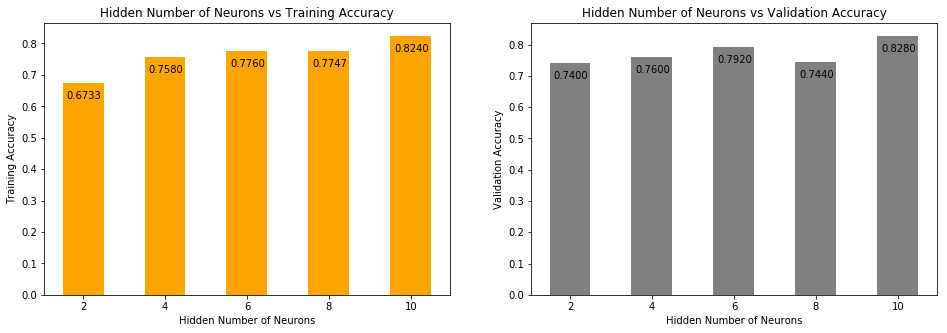

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax[0].set_title('Hidden Number of Neurons vs Training Accuracy')
ax[0].set_ylabel('Training Accuracy')
ax[0].set_xlabel('Hidden Number of Neurons')
ax[0].bar(hidden_neurons,
          [histories[i].history['acc'][-1] for i in range(len(hidden_neurons))],
          width=1,
          color='orange')
for i in range(len(hidden_neurons)):
    ax[0].annotate('{:.4f}'.format(histories[i].history['acc'][-1]),
                   (hidden_neurons[i]-0.4, histories[i].history['acc'][-1]-0.05))

ax[1].set_title('Hidden Number of Neurons vs Validation Accuracy')
ax[1].set_ylabel('Validation Accuracy')
ax[1].set_xlabel('Hidden Number of Neurons')
ax[1].bar(hidden_neurons,
          [eval_results[i][1] for i in range(len(hidden_neurons))],
          width=1,
          color='gray')
for i in range(len(hidden_neurons)):
    ax[1].annotate('{:.4f}'.format(eval_results[i][1]),
                   (hidden_neurons[i]-0.4, eval_results[i][1]-0.05))

## (d) Provide a simple analysis about your results and choose the optimal number of hidden neuron from the analysis.

In [8]:
model = models[4]

## (e) Report the test accuracy using the given test dataset (X test, Y test) on the neural network with the optimal number of hidden neurons.

In [9]:
print('Testing Model with 10 neurons in hidden layer')
eval_result = model.evaluate(x=test_x, y=test_y, batch_size=50)
print('Mean Squared Error - {:.4f}'.format(eval_result[0]))
print('Accuracy - {:.4f}'.format(eval_result[1]))
print()

Testing Model with 10 neurons in hidden layer
250/250 [==============================] - 0s 18us/step
Mean Squared Error - 0.1594
Accuracy - 0.7880

